```
         Copyright Rein Halbersma 2018-2020.
Distributed under the Boost Software License, Version 1.0.
   (See accompanying file LICENSE_1_0.txt or copy at
         http://www.boost.org/LICENSE_1_0.txt)
```

# Won/Loss Percentage of Every Stratego Flag Position (Almost 42,500 Games)

## 1. Reproducing Dobby125's [blog post](http://stratego-tips.blogspot.com/2017/04/wonloss-percentage-of-every-stratego.html)

In [1]:
from IPython.display import display, HTML

import gravon.package as pkg
from gravon.piece import Rank, rank_names
from gravon.stats import setup_placement
from gravon.plots import setup_heatmap2

db_setups = pkg.load_dataset('db_setups')

In [2]:
classic_xml = (db_setups
    .query('type == "classic" & ext == ".xml"')
    .assign(result = lambda r: r.result.cat.reorder_categories(['win', 'loss', 'draw']))    
)
sum    = setup_placement(classic_xml,                           'sum')
sum_W  = setup_placement(classic_xml.query('result == "win"' ), 'sum')
sum_WL = setup_placement(classic_xml.query('result != "draw"'), 'sum')
r = Rank._F

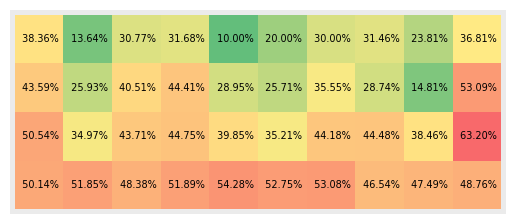

<ggplot: (8778501950386)>
Draws were not included in this tabulation


In [3]:
display(HTML(f'<h3>Won /(Won+Loss) Percentage from Every {rank_names[r].capitalize()} Position</h3>'))
print(setup_heatmap2(sum_W[r], sum_WL[r], format_string='{:>7.2%}', axis_text=False, log10_scale=False, margins=()))
print(f'Draws were not included in this tabulation')

In [4]:
from itertools import product
import pandas as pd

for flag in product(range(4), range(10)):
    df = classic_xml.query('flag == @flag')
    crosstab = pd.crosstab(df.player, df.result, margins=True, dropna=False)
    W, L, D = crosstab.values[2, :-1]
    row, col = flag
    print(f'Flag position = {10 * row + col}')
    print(crosstab)
    print(f'Win/(Win+Loss) Percentage = {W / (W + L):.4f} Win/(Win+Loss+Draw) Percentage = {W / (W + L + D):.4f}\n')

Flag position = 0
result   win  loss  draw   All
player                        
red     1941  2058   165  4164
blue    1752  1615   135  3502
All     3693  3673   300  7666
Win/(Win+Loss) Percentage = 0.5014 Win/(Win+Loss+Draw) Percentage = 0.4817

Flag position = 1
result   win  loss  draw   All
player                        
red      630   604    56  1290
blue     465   413    32   910
All     1095  1017    88  2200
Win/(Win+Loss) Percentage = 0.5185 Win/(Win+Loss+Draw) Percentage = 0.4977

Flag position = 2
result   win  loss  draw   All
player                        
red     1334  1538    82  2954
blue    1485  1470   132  3087
All     2819  3008   214  6041
Win/(Win+Loss) Percentage = 0.4838 Win/(Win+Loss+Draw) Percentage = 0.4666

Flag position = 3
result   win  loss  draw    All
player                         
red     2543  2529   179   5251
blue    3085  2688   197   5970
All     5628  5217   376  11221
Win/(Win+Loss) Percentage = 0.5189 Win/(Win+Loss+Draw) Percentage = 0.5016


## 2. Improvements

We make the following improvements: 
- First, we include all Gravon games, both in the .gsn and .xml formats. This increases the number of setups to over a hundred thousand.
- Second, we denote flag positions in algebraic notation (columns = a...j, rows = 1...4).
- Third, we order game outcomes as Win, Draw, Loss.
- Finally, we summarize the average percentage score (win = 1.0, draw = 0.5 and loss = 0.0 points).

Note that the table cells in this notebook are not correctly aligned when rendered on GitHub.

In [5]:
classic = db_setups.query('type == "classic"')
sum   = setup_placement(classic,                           'sum')
sum_W = setup_placement(classic.query('result == "win"' ), 'sum')
sum_D = setup_placement(classic.query('result == "draw"'), 'sum')

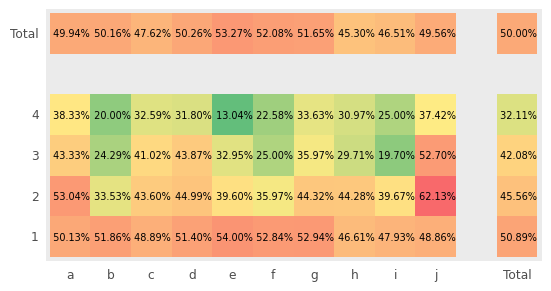

<ggplot: (8778500833916)>


In [6]:
display(HTML(f'<h3>Score Percentage from Every {rank_names[r].capitalize()} Position</h3>'))
print(setup_heatmap2(1.0 * sum_W[r] + 0.5 * sum_D[r], sum[r], format_string='{:>7.2%}', log10_scale=False))

In [7]:
from gravon.setup import col_labels, row_labels

for flag in product(range(4), range(10)):
    df = classic.query('flag == @flag')
    crosstab = pd.crosstab(df.player, df.result, margins=True, dropna=False)
    W, D, L = crosstab.values[2, :-1]
    row, col = flag
    print(f'Flag position = {col_labels[col]}{row_labels[row]}')
    display(crosstab.style.format('{:,}'))
    print(f'Score Percentage = {(1.0 * W + 0.5 * D) / (W + D + L):.2%}\n')

Flag position = a1


result,win,draw,loss,All
player,,,,
red,"2,248",189,"2,416","4,853"
blue,"2,158",159,"1,967","4,284"
All,"4,406",348,"4,383","9,137"


Score Percentage = 50.13%

Flag position = b1


result,win,draw,loss,All
player,,,,
red,732,58,703,"1,493"
blue,570,42,502,"1,114"
All,"1,302",100,"1,205","2,607"


Score Percentage = 51.86%

Flag position = c1


result,win,draw,loss,All
player,,,,
red,"1,696",94,"1,935","3,725"
blue,"1,909",146,"1,839","3,894"
All,"3,605",240,"3,774","7,619"


Score Percentage = 48.89%

Flag position = d1


result,win,draw,loss,All
player,,,,
red,"3,308",223,"3,309","6,840"
blue,"3,915",241,"3,509","7,665"
All,"7,223",464,"6,818","14,505"


Score Percentage = 51.40%

Flag position = e1


result,win,draw,loss,All
player,,,,
red,"2,387",180,"2,118","4,685"
blue,"2,490",172,"2,010","4,672"
All,"4,877",352,"4,128","9,357"


Score Percentage = 54.00%

Flag position = f1


result,win,draw,loss,All
player,,,,
red,"1,975",141,"1,808","3,924"
blue,"2,131",162,"1,840","4,133"
All,"4,106",303,"3,648","8,057"


Score Percentage = 52.84%

Flag position = g1


result,win,draw,loss,All
player,,,,
red,"4,021",263,"3,869","8,153"
blue,"4,702",263,"3,855","8,820"
All,"8,723",526,"7,724","16,973"


Score Percentage = 52.94%

Flag position = h1


result,win,draw,loss,All
player,,,,
red,"1,913",130,"2,303","4,346"
blue,"1,920",134,"2,106","4,160"
All,"3,833",264,"4,409","8,506"


Score Percentage = 46.61%

Flag position = i1


result,win,draw,loss,All
player,,,,
red,543,51,612,"1,206"
blue,479,39,502,"1,020"
All,"1,022",90,"1,114","2,226"


Score Percentage = 47.93%

Flag position = j1


result,win,draw,loss,All
player,,,,
red,"2,876",243,"3,248","6,367"
blue,"2,780",229,"2,682","5,691"
All,"5,656",472,"5,930","12,058"


Score Percentage = 48.86%

Flag position = a2


result,win,draw,loss,All
player,,,,
red,83,8,101,192
blue,133,13,89,235
All,216,21,190,427


Score Percentage = 53.04%

Flag position = b2


result,win,draw,loss,All
player,,,,
red,18,4,54,76
blue,36,0,55,91
All,54,4,109,167


Score Percentage = 33.53%

Flag position = c2


result,win,draw,loss,All
player,,,,
red,260,15,348,623
blue,227,19,287,533
All,487,34,635,"1,156"


Score Percentage = 43.60%

Flag position = d2


result,win,draw,loss,All
player,,,,
red,356,22,406,784
blue,397,25,520,942
All,753,47,926,"1,726"


Score Percentage = 44.99%

Flag position = e2


result,win,draw,loss,All
player,,,,
red,58,3,87,148
blue,55,11,89,155
All,113,14,176,303


Score Percentage = 39.60%

Flag position = f2


result,win,draw,loss,All
player,,,,
red,32,12,76,120
blue,51,4,78,133
All,83,16,154,253


Score Percentage = 35.97%

Flag position = g2


result,win,draw,loss,All
player,,,,
red,330,29,474,833
blue,483,30,555,"1,068"
All,813,59,"1,029","1,901"


Score Percentage = 44.32%

Flag position = h2


result,win,draw,loss,All
player,,,,
red,270,16,353,639
blue,256,16,313,585
All,526,32,666,"1,224"


Score Percentage = 44.28%

Flag position = i2


result,win,draw,loss,All
player,,,,
red,36,3,51,90
blue,33,5,56,94
All,69,8,107,184


Score Percentage = 39.67%

Flag position = j2


result,win,draw,loss,All
player,,,,
red,169,16,118,303
blue,242,12,127,381
All,411,28,245,684


Score Percentage = 62.13%

Flag position = a3


result,win,draw,loss,All
player,,,,
red,24,1,43,68
blue,33,2,32,67
All,57,3,75,135


Score Percentage = 43.33%

Flag position = b3


result,win,draw,loss,All
player,,,,
red,1,0,12,13
blue,7,1,14,22
All,8,1,26,35


Score Percentage = 24.29%

Flag position = c3


result,win,draw,loss,All
player,,,,
red,41,5,61,107
blue,39,4,56,99
All,80,9,117,206


Score Percentage = 41.02%

Flag position = d3


result,win,draw,loss,All
player,,,,
red,118,6,132,256
blue,57,2,93,152
All,175,8,225,408


Score Percentage = 43.87%

Flag position = e3


result,win,draw,loss,All
player,,,,
red,10,1,18,29
blue,3,2,10,15
All,13,3,28,44


Score Percentage = 32.95%

Flag position = f3


result,win,draw,loss,All
player,,,,
red,7,1,15,23
blue,2,2,15,19
All,9,3,30,42


Score Percentage = 25.00%

Flag position = g3


result,win,draw,loss,All
player,,,,
red,34,3,75,112
blue,55,1,85,141
All,89,4,160,253


Score Percentage = 35.97%

Flag position = h3


result,win,draw,loss,All
player,,,,
red,30,1,72,103
blue,30,2,72,104
All,60,3,144,207


Score Percentage = 29.71%

Flag position = i3


result,win,draw,loss,All
player,,,,
red,3,1,11,15
blue,2,2,14,18
All,5,3,25,33


Score Percentage = 19.70%

Flag position = j3


result,win,draw,loss,All
player,,,,
red,159,13,147,319
blue,123,8,105,236
All,282,21,252,555


Score Percentage = 52.70%

Flag position = a4


result,win,draw,loss,All
player,,,,
red,37,2,63,102
blue,30,2,46,78
All,67,4,109,180


Score Percentage = 38.33%

Flag position = b4


result,win,draw,loss,All
player,,,,
red,4,0,5,9
blue,1,0,15,16
All,5,0,20,25


Score Percentage = 20.00%

Flag position = c4


result,win,draw,loss,All
player,,,,
red,42,6,84,132
blue,34,3,78,115
All,76,9,162,247


Score Percentage = 32.59%

Flag position = d4


result,win,draw,loss,All
player,,,,
red,38,3,92,133
blue,42,3,83,128
All,80,6,175,261


Score Percentage = 31.80%

Flag position = e4


result,win,draw,loss,All
player,,,,
red,1,1,19,21
blue,4,1,20,25
All,5,2,39,46


Score Percentage = 13.04%

Flag position = f4


result,win,draw,loss,All
player,,,,
red,2,2,15,19
blue,4,0,8,12
All,6,2,23,31


Score Percentage = 22.58%

Flag position = g4


result,win,draw,loss,All
player,,,,
red,29,3,85,117
blue,44,3,62,109
All,73,6,147,226


Score Percentage = 33.63%

Flag position = h4


result,win,draw,loss,All
player,,,,
red,70,17,162,249
blue,62,7,147,216
All,132,24,309,465


Score Percentage = 30.97%

Flag position = i4


result,win,draw,loss,All
player,,,,
red,8,2,18,28
blue,2,2,16,20
All,10,4,34,48


Score Percentage = 25.00%

Flag position = j4


result,win,draw,loss,All
player,,,,
red,25,2,56,83
blue,33,1,42,76
All,58,3,98,159


Score Percentage = 37.42%



## 3. Extensions

### a) Flag safety

In [8]:
losses = classic.query('result == "loss"')
sum_L = setup_placement(losses, 'sum')

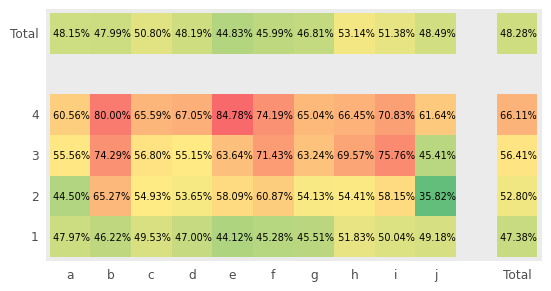

<ggplot: (8778499780717)>


In [9]:
display(HTML(f'<h3>Percentage Losing Games from Every {rank_names[r].capitalize()} Position</h3>'))
print(setup_heatmap2(sum_L[r], sum[r], format_string='{:>7.2%}'))

In [10]:
sum_F = setup_placement(losses.query('ending == "flag captured"'), 'sum')

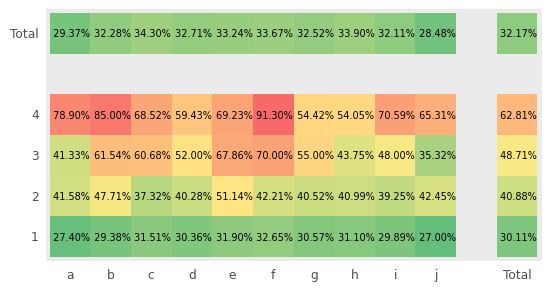

<ggplot: (8778500528999)>


In [11]:
display(HTML(f'<h3>Own Flag Captured as Percentage of Losing Games from Every {rank_names[r].capitalize()} Position</h3>'))
print(setup_heatmap2(sum_F[r], sum_L[r], format_string='{:>7.2%}'))

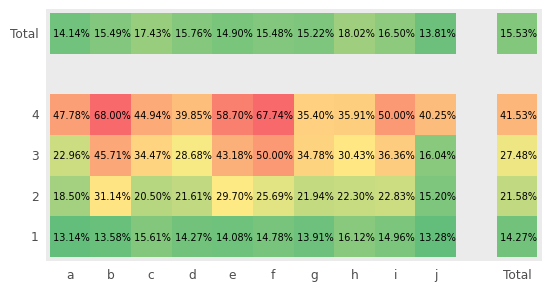

<ggplot: (8778501885242)>


In [12]:
display(HTML(f'<h3>Own Flag Captured as Percentage of All Games from Every {rank_names[r].capitalize()} Position</h3>'))
print(setup_heatmap2(sum_F[r], sum[r], format_string='{:>7.2%}'))